<a href="https://colab.research.google.com/github/Tranganh1111/network_datasets/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cdlib

In [ ]:
def new(a, b):
  c = a+b
  d = a-b
  return c, d
new(6,5)[0]

11

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import count
#from cdlib import algorithms, viz
#import cdlib
!git clone https://github.com/Tranganh1111/network_datasets

Cloning into 'net_datasets'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 51
Unpacking objects: 100% (55/55), done.


In [ ]:
#create network 
G = nx.read_gml('net_datasets/karate/karate.gml', label = 'id')
#G = nx.read_gml('net_datasets/dolphins/dolphins.gml', label = 'id')
#G = nx.read_gml('net_datasets/adjnoun/adjnoun.gml', label = 'id')
#G = nx.read_gml('net_datasets/football/football.gml', label = 'id')
#G = nx.read_gml('net_datasets/polbooks/polbooks.gml', label = 'id')

In [ ]:
print(G[2].items)

<bound method Mapping.items of AtlasView({1: {}, 3: {}, 4: {}, 8: {}, 14: {}, 18: {}, 20: {}, 22: {}, 31: {}})>


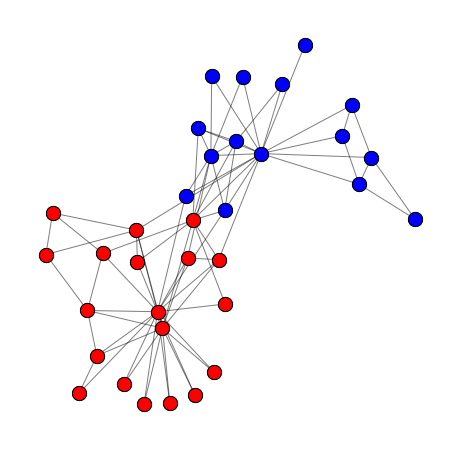

In [ ]:
coms = algorithms.girvan_newman(G, 1)
pos = nx.spring_layout(G)
viz.plot_network_clusters(G, coms, pos)

In [ ]:
coms = algorithms.girvan_newman(G, 0)
pos = nx.spring_layout(G)
viz.plot_network_clusters(G, coms, pos)

In [ ]:
# create network example in paper, 17 nodes, 30 edges
'''
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
G.add_edges_from([(1, 2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(1,9),(2,9),(3,9),(4,9),(5,9),(7,9),(9,11),(9,14),(9,15),(9,16),(9,17),(10,15),(10,17),(11,14),(12,14),(13,14),(14,15),(14,16),(14,17),(15,16),(15,17),(16,17)])
'''

'\nG = nx.Graph()\nG.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])\nG.add_edges_from([(1, 2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(1,9),(2,9),(3,9),(4,9),(5,9),(7,9),(9,11),(9,14),(9,15),(9,16),(9,17),(10,15),(10,17),(11,14),(12,14),(13,14),(14,15),(14,16),(14,17),(15,16),(15,17),(16,17)])\n'

34
78


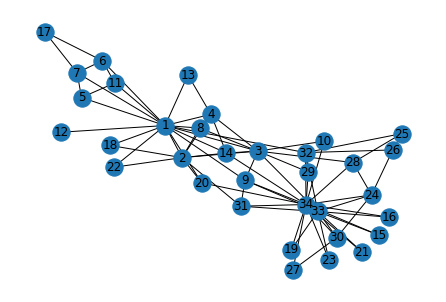

In [ ]:
V = list(G.nodes) #tap cac nut cua G
E = list(G.edges) #tap cac canh cua G
print(len(V))
print(len(E))
#draw G
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)


# Algorithm 1
# Get similarity based communities


In [ ]:
#the community-size threshold
k = 3

In [ ]:
#first neighbors of v, T(v)
def f_nei(v):
  return list(G.neighbors(v))

In [ ]:
#first and second neighbors of v, T2(v)
def fs_nei(v):
  y = []
  for x in f_nei(v):
    y += list(G.neighbors(x))
  u = list(set(y).union(set(f_nei(v))))
  u.remove(v)
  return u


In [ ]:
# calculate similarity of v and u:
def sim(v, u):
  if u in fs_nei(v):
    if u in f_nei(v):
      a = 1
    else: a = 0
    b = len(list(set(f_nei(u)).intersection(set(f_nei(v)))))
    c = len(f_nei(u)) + len(f_nei(v))
    sim = (a + b) / (c/2)
    return sim
  else:
    return 0

In [ ]:
U = V.copy()
U.sort(key=lambda x: len(f_nei(x)), reverse=True)

In [ ]:
# find x: sim(v, x) max, x in T(v) U T2(v)
def xagrmax(v):
  a = {}
  for x in fs_nei(v):
    a[(v, x)] = sim(v, x)
  b = max(a.values())
  c = []
  for k, y in a.items():
    if y == b:
      c.append(k[1])
  if len(c) == 1:
    return c[0]
  else:
    d = []
    e = []
    for i in c:
      if i in f_nei(v):
        d.append(i)
      else:
        e.append(i)
    if len(d) == 0:
      return random.choice(e)
    elif len(d) == 1:
      return d[0]
    else:
      return random.choice(d)
      
for v in U:
  print(v, xagrmax(v), list(G.neighbors(v)))

34 33 [9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33]
1 2 [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]
33 34 [3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34]
3 4 [1, 2, 4, 8, 9, 10, 14, 28, 29, 33]
2 4 [1, 3, 4, 8, 14, 18, 20, 22, 31]
4 8 [1, 2, 3, 8, 13, 14]
32 24 [1, 25, 26, 29, 33, 34]
9 31 [1, 3, 31, 33, 34]
14 8 [1, 2, 3, 4, 34]
24 30 [26, 28, 30, 33, 34]
6 5 [1, 7, 11, 17]
7 11 [1, 5, 6, 17]
8 14 [1, 2, 3, 4]
28 10 [3, 24, 25, 34]
30 27 [24, 27, 33, 34]
31 9 [2, 9, 33, 34]
5 6 [1, 7, 11]
11 7 [1, 5, 6]
20 18 [1, 2, 34]
25 26 [26, 28, 32]
26 25 [24, 25, 32]
29 10 [3, 32, 34]
10 29 [3, 34]
13 12 [1, 4]
15 16 [33, 34]
16 19 [33, 34]
17 6 [6, 7]
18 22 [1, 2]
19 21 [33, 34]
21 19 [33, 34]
22 18 [1, 2]
23 15 [33, 34]
27 30 [30, 34]
12 13 [1]


In [ ]:
# Mark every node as unclassified and initialize CS and U to record the community structure and the unvisited nodes, respectively.
for u in U:
  G.nodes[u]['label'] = 0
import collections
CS = collections.defaultdict(list)
#CS = dict()
com_id = 0
G.nodes(data=True)

NodeDataView({1: {'label': 0}, 2: {'label': 0}, 3: {'label': 0}, 4: {'label': 0}, 5: {'label': 0}, 6: {'label': 0}, 7: {'label': 0}, 8: {'label': 0}, 9: {'label': 0}, 10: {'label': 0}, 11: {'label': 0}, 12: {'label': 0}, 13: {'label': 0}, 14: {'label': 0}, 15: {'label': 0}, 16: {'label': 0}, 17: {'label': 0}, 18: {'label': 0}, 19: {'label': 0}, 20: {'label': 0}, 21: {'label': 0}, 22: {'label': 0}, 23: {'label': 0}, 24: {'label': 0}, 25: {'label': 0}, 26: {'label': 0}, 27: {'label': 0}, 28: {'label': 0}, 29: {'label': 0}, 30: {'label': 0}, 31: {'label': 0}, 32: {'label': 0}, 33: {'label': 0}, 34: {'label': 0}})

In [ ]:
# select node v with the largest degree from U, fing its most similar node, and determine their community affiliations

for v in U:
  u = xagrmax(v)
  v_label = nx.get_node_attributes(G, 'label')[v]
  u_label = nx.get_node_attributes(G, 'label')[u]
  if v_label == 0:
    if u_label != 0:
      G.nodes[v]['label'] = u_label
      i = u_label
      CS[i].append(v)
    else:
      com_id = com_id + 1
      G.nodes[v]['label'] = com_id
      G.nodes[u]['label'] = com_id
      CS[com_id] = [v, u]
  else:
    i = v_label
    j = u_label
    if i != j:
      if len(CS[i]) < k:
        if u_label != 0:
          for w in CS[i]:
            G.nodes[w]['label'] = u_label
          CS[j] = list(set(CS[i]).union(set(CS[j])))
          CS.pop(i)
        else:
          G.nodes[u]['label'] = v_label
          CS[i].append(u)
  print('xét node ', v, 'similar node: ', u)
  print(CS)

xét node  34 similar node:  33
defaultdict(<class 'list'>, {1: [34, 33]})
xét node  1 similar node:  2
defaultdict(<class 'list'>, {1: [34, 33], 2: [1, 2]})
xét node  33 similar node:  34
defaultdict(<class 'list'>, {1: [34, 33], 2: [1, 2]})
xét node  3 similar node:  4
defaultdict(<class 'list'>, {1: [34, 33], 2: [1, 2], 3: [3, 4]})
xét node  2 similar node:  4
defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4]})
xét node  4 similar node:  8
defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4]})
xét node  32 similar node:  24
defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4], 4: [32, 24]})
xét node  9 similar node:  31
defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4], 4: [32, 24], 5: [9, 31]})
xét node  14 similar node:  8
defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4], 4: [32, 24], 5: [9, 31], 6: [14, 8]})
xét node  24 similar node:  30
defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4], 4: [32, 24, 30], 5: [9, 31], 6: [14, 8]})
xét node

Draw initial network


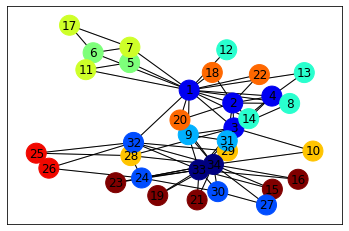

In [ ]:
# draw initial network
groups = set(nx.get_node_attributes(G,'label').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['label']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx(G, pos, nodelist=nodes, node_color=colors, with_labels = True, node_size=400, cmap=plt.cm.jet)

#Algorithm 2
# Adjustment for boundary node's community affiliations and merging of some initial communities

In [ ]:
CS_init = CS.copy()
print(CS_init)

defaultdict(<class 'list'>, {1: [34, 33], 3: [1, 2, 3, 4], 4: [32, 24, 30, 27], 5: [9, 31], 6: [14, 8, 13, 12], 7: [6, 5], 8: [7, 11, 17], 9: [28, 10, 29], 10: [20, 22, 18], 11: [25, 26], 13: [16, 19, 21, 15, 23]})


In [ ]:
#find j: len(T(v) + Cj) max
def jamax(v):
  x = {}
  for i in CS_init.keys():
    x[i] = int(len(list(set(f_nei(v)).intersection(set(CS_init[i])))))
  
  j = [keys for keys,values in x.items() if values == max(x.values())]
  a = []
  for k in j:
    if v in CS_init[k]:
      a.append(k)
  if len(a) == 1:
    return a[0]
  else:
    j.sort(key=lambda b: len(CS_init[b]))
    return j[0]

for v in V:
  print(v, f_nei(v), jamax(v))

1 [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32] 6
2 [1, 3, 4, 8, 14, 18, 20, 22, 31] 3
3 [1, 2, 4, 8, 9, 10, 14, 28, 29, 33] 3
4 [1, 2, 3, 8, 13, 14] 3
5 [1, 7, 11] 8
6 [1, 7, 11, 17] 8
7 [1, 5, 6, 17] 7
8 [1, 2, 3, 4] 3
9 [1, 3, 31, 33, 34] 1
10 [3, 34] 1
11 [1, 5, 6] 7
12 [1] 3
13 [1, 4] 3
14 [1, 2, 3, 4, 34] 3
15 [33, 34] 1
16 [33, 34] 1
17 [6, 7] 8
18 [1, 2] 3
19 [33, 34] 1
20 [1, 2, 34] 3
21 [33, 34] 1
22 [1, 2] 3
23 [33, 34] 1
24 [26, 28, 30, 33, 34] 1
25 [26, 28, 32] 11
26 [24, 25, 32] 4
27 [30, 34] 4
28 [3, 24, 25, 34] 1
29 [3, 32, 34] 1
30 [24, 27, 33, 34] 4
31 [2, 9, 33, 34] 1
32 [1, 25, 26, 29, 33, 34] 1
33 [3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34] 13
34 [9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33] 13


In [ ]:
# A(v, w) = 1 if vertices v and w are connected, else A(v, w) = 0
def A(v, w):
  if v in f_nei(w):
    return 1
  else:
    return 0

def Delta(i, j):
  if i == j:
    return 1
  else:
    return 0

# calculate Q
def Q(CS_init):
  Q = 0
  for v in range(len(V)-1):
    for w in range(v+1, len(V)):
      v = V[v]
      w = V[w]
      Q += (A(v, w) - len(f_nei(v)) * len(f_nei(w)) / (2 * len(E))) * Delta(nx.get_node_attributes(G, 'label')[v], nx.get_node_attributes(G, 'label')[w])
  Q = Q / (2 * len(E))
  return Q

# the density of edges connecting from the community Ci to Cj
def d(i, j):
  e = 0
  for v in CS_init[i]:
    for u in CS_init[j]:
      if u in f_nei(v):
        e += 1
  d = e / len(CS_init[i])
  return d 

# calculate edges in community i
def edgein(i):
  e = 0
  for v in CS_init[i]:
    for u in CS_init[i]:
      if (v, u) in E:
        e += 1
  return e

# test all communities in CS_init have egde
def all_edge(CS):
  for i in CS.keys():
    if edgein(i) == 0:
      return False
  else:
    return True
    
# calculate communities adjacent to Ci
def N(i):
  a = []
  for j in CS_init.keys():
    if i != j:
      x = 0
      for v in CS_init[i]:
        for u in CS_init[j]:
          if u in f_nei(v):
            x += 1
      if x > 0:
        a.append(j)
  return a

print(Q(CS_init))

0.07860782380013144


Adjust the community affiliations of boundary nodes in the initial communities

In [ ]:
# adjust the community affiliations of boundary nodes in the initial communities
def adjust_boundary(G, CS_init, V):
  for v in V:
    t = jamax(v)
    if t != nx.get_node_attributes(G, 'label')[v]:
      s = nx.get_node_attributes(G, 'label')[v]
      G.nodes[v]['label'] = t
      CS_init[t].append(v)
      CS_init[s].remove(v)
      if len(CS_init[s]) == 0:
        CS_init.pop(s)
  return G, CS_init

G, CS_init = adjust_boundary(G, CS_init, V)

if all_edge(CS_init) == False:
  while True:
    G, CS_init = adjust_boundary(G, CS_init, V)
    if all_edge(CS_init) == True:
      break
      
print(CS_init)
G.nodes(data=True)

defaultdict(<class 'list'>, {1: [34, 33, 9, 15, 16, 19, 21, 23, 24, 28, 30, 31, 27], 6: [14, 8, 13, 12, 1, 4, 2, 3, 10, 18, 20, 22], 8: [7, 11, 17, 5, 6], 11: [25, 26, 32, 29]})


NodeDataView({1: {'label': 6}, 2: {'label': 6}, 3: {'label': 6}, 4: {'label': 6}, 5: {'label': 8}, 6: {'label': 8}, 7: {'label': 8}, 8: {'label': 6}, 9: {'label': 1}, 10: {'label': 6}, 11: {'label': 8}, 12: {'label': 6}, 13: {'label': 6}, 14: {'label': 6}, 15: {'label': 1}, 16: {'label': 1}, 17: {'label': 8}, 18: {'label': 6}, 19: {'label': 1}, 20: {'label': 6}, 21: {'label': 1}, 22: {'label': 6}, 23: {'label': 1}, 24: {'label': 1}, 25: {'label': 11}, 26: {'label': 11}, 27: {'label': 1}, 28: {'label': 1}, 29: {'label': 11}, 30: {'label': 1}, 31: {'label': 1}, 32: {'label': 11}, 33: {'label': 1}, 34: {'label': 1}})

Merge some communities according to the link strength between communities

In [ ]:
# calculate link strength
def LS(CS_init):
  ls = {}
  for i in CS_init.keys():
    for j in CS_init.keys():
      if j in N(i):
        ls[(i, j)] = (d(i, j) * d(j, i)) / (edgein(i) * edgein(j) * len(N(i)))
  return ls

# find threshold
ls = LS(CS_init) # link strength of CS_init
LSmin = min(list(ls.values()))
LSmax = max(list(ls.values()))
thershold = LSmin * 100
while thershold > LSmax:
  thershold = thershold / 2
# LS > thershold
ls_ther = {key: value for key, value in ls.items() if value > thershold}

print(ls)
print(ls_ther)
print(LSmin)
print(LSmax)
print(thershold)
print(CS_init)

{(1, 6): 0.0003418803418803419, (1, 11): 0.002403846153846154, (6, 1): 0.0002279202279202279, (6, 8): 0.0006172839506172839, (6, 11): 0.00028935185185185184, (8, 6): 0.001851851851851852, (11, 1): 0.002403846153846154, (11, 6): 0.00043402777777777775}
{(1, 11): 0.002403846153846154, (8, 6): 0.001851851851851852, (11, 1): 0.002403846153846154}
0.0002279202279202279
0.002403846153846154
0.0014245014245014244
defaultdict(<class 'list'>, {1: [34, 33, 9, 15, 16, 19, 21, 23, 24, 28, 30, 31, 27], 6: [14, 8, 13, 12, 1, 4, 2, 3, 10, 18, 20, 22], 8: [7, 11, 17, 5, 6], 11: [25, 26, 32, 29]})


In [ ]:
#Merge some communities according to the link strength between communities 

q = 0
while True:
  print('vòng')
  qnew = Q(CS_init) # calculate modulatiy Q for community structure
  print(qnew)
  if qnew <= q:
    break
  else:
    q = qnew
  print(q)
  # merge all community pairs (Ci, Cj) with LS(Ci, Cj) > threshold
  for key in ls_ther.keys():
    CS_init[key[0]].extend(CS_init[key[1]])
    for i in CS_init[key[1]]:
      G.nodes[i]['label'] = key[0]
    CS_init.pop(key[1])
  print(CS_init)
  ls = LS(CS_init) # recalculate LS(Ci, Cj) with LS(Ci, Cj) > threshod
  print(ls)
  
  thershold = 0.9 * thershold # reduce threshold to 90% of its value
  print(thershold)
  ls_ther = {key: value for key, value in ls.items() if value > thershold}
  print(ls_ther)

vòng
0.08888067061143988
0.08888067061143988
defaultdict(<class 'list'>, {8: [7, 11, 17, 5, 6, 14, 8, 13, 12, 1, 4, 2, 3, 10, 18, 20, 22], 11: [34, 33, 9, 15, 16, 19, 21, 23, 24, 28, 30, 31, 27, 25, 26, 32, 29]})
{(8, 11): 0.0002993259180325906, (11, 8): 0.0002993259180325906}
0.001282051282051282
{}
vòng
0.10527613412228827
0.10527613412228827
defaultdict(<class 'list'>, {8: [7, 11, 17, 5, 6, 14, 8, 13, 12, 1, 4, 2, 3, 10, 18, 20, 22], 11: [34, 33, 9, 15, 16, 19, 21, 23, 24, 28, 30, 31, 27, 25, 26, 32, 29]})
{(8, 11): 0.0002993259180325906, (11, 8): 0.0002993259180325906}
0.001153846153846154
{}
vòng
0.10527613412228827


Draw final network

Q:  0.10527613412228827


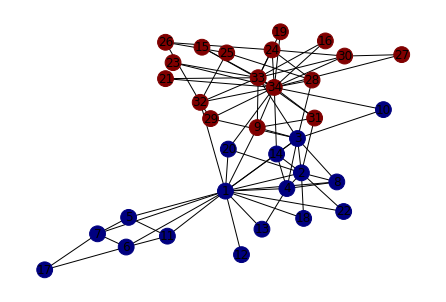

In [ ]:
# draw community structure of network
groups = set(nx.get_node_attributes(G,'label').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['label']] for n in nodes]
pos = nx.spring_layout(G)
nc = nx.draw(G, pos, nodelist=nodes, node_color=colors, with_labels = True,node_size=250, cmap=plt.cm.jet)

#print Q of network
print('Q: ', Q(CS_init))